In [1]:
import warnings
from astropy.modeling import models
from astropy import units as u
from scipy.signal import find_peaks, peak_widths
from specutils import Spectrum1D, SpectralRegion
from specutils.fitting import fit_lines
from specutils.fitting import fit_continuum
from specutils.analysis import gaussian_sigma_width, gaussian_fwhm, fwhm, fwzi, equivalent_width
import random

from astropy.io import ascii, fits

from  matplotlib import pyplot as plt

import numpy as np
import extinction
from extinction import ccm89, apply, remove, calzetti00
import numpy as np
import pyneb as pn
from astropy.io import ascii, fits

import pandas

import scipy

from astropy.table import Table
from scipy import integrate
 
import extinction
from extinction import ccm89, apply, remove

from  matplotlib import pyplot as plt
import pyneb as pn
from astropy.io import ascii, fits
from specutils import Spectrum1D
import astropy.units as u
from specutils.manipulation import box_smooth, gaussian_smooth, trapezoid_smooth
from specutils.analysis import line_flux
from specutils.analysis import equivalent_width

/Users/nickfoo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
f=open('F090W_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F090Wwave_trans=np.asarray(one, dtype=float)
F090Wflux_trans=np.asarray(two, dtype=float)
F090Wwave_trans=F090Wwave_trans*10000





f=open('F115W_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F115Wwave_trans=np.asarray(one, dtype=float)
F115Wflux_trans=np.asarray(two, dtype=float)
F115Wwave_trans=F115Wwave_trans*10000



f=open('F150W_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F150Wwave_trans=np.asarray(one, dtype=float)
F150Wflux_trans=np.asarray(two, dtype=float)
F150Wwave_trans=F150Wwave_trans*10000


f=open('F200W_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F200Wwave_trans=np.asarray(one, dtype=float)
F200Wflux_trans=np.asarray(two, dtype=float)
F200Wwave_trans=F200Wwave_trans*10000

f=open('F277W_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F277Wwave_trans=np.asarray(one, dtype=float)
F277Wflux_trans=np.asarray(two, dtype=float)
F277Wwave_trans=F277Wwave_trans*10000


f=open('F356W_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F356Wwave_trans=np.asarray(one, dtype=float)
F356Wflux_trans=np.asarray(two, dtype=float)
F356Wwave_trans=F356Wwave_trans*10000


f=open('F444W_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F444Wwave_trans=np.asarray(one, dtype=float)
F444Wflux_trans=np.asarray(two, dtype=float)
F444Wwave_trans=F444Wwave_trans*10000



f=open('F410M_transmission.dat',"r")
lines=f.readlines()[1:]
one=[]
two=[]



for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])

    
    


F410Mwave_trans=np.asarray(one, dtype=float)
F410Mflux_trans=np.asarray(two, dtype=float)
F410Mwave_trans=F410Mwave_trans*10000



f=open('l3_4446001001_03101_s00046_src00969_x1d_optimal_flam_sm.dat',"r")
lines=f.readlines()
one=[]
two=[]
three=[]


for i in lines:
    #print(i)
    one.append(i.split()[0])
    two.append(i.split()[1])
    three.append(i.split()[2])
    
    


wave1=np.asarray(one, dtype=float)
flux1=np.asarray(two, dtype=float)
flux_err1=np.asarray(three, dtype=float)

flux1=flux1*(10**(-17))
flux_err1=flux_err1*(10**(-17))


f=open('l3_4446001001_03103_s00046_src00969_x1d_optimal_flam2.dat',"r")
lines=f.readlines()
one=[]
two=[]
three=[]


for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])
    three.append(i.split()[2])
    
    


wave3=np.asarray(one, dtype=float)
flux3=np.asarray(two, dtype=float)
flux_err3=np.asarray(three, dtype=float)

flux3=flux3*(10**(-17))
flux_err3=flux_err3*(10**(-17))



f=open('l3c_4446001001_03105_s00337_00337_x1d_optimal_flam.dat',"r")
lines=f.readlines()
one=[]
two=[]
three=[]


for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])
    three.append(i.split()[2])
    
    


waveP=np.asarray(one, dtype=float)
fluxP=np.asarray(two, dtype=float)
flux_errP=np.asarray(three, dtype=float)

fluxP=fluxP*(10**(-17))
flux_errP=flux_errP*(10**(-17))




f=open('l3_4446001001_03105_s00002_src00007_x1d_optimal_flam2.dat',"r")
lines=f.readlines()
one=[]
two=[]
three=[]


for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])
    three.append(i.split()[2])
    
    


waveP2=np.asarray(one, dtype=float)
fluxP2=np.asarray(two, dtype=float)
flux_errP2=np.asarray(three, dtype=float)

fluxP2=fluxP2*(10**(-17))
flux_errP2=flux_errP2*(10**(-17))



f=open('l3_4446001001_03101_s00046_src00046_x1d_optimal_flam.dat',"r")
lines=f.readlines()
one=[]
two=[]
three=[]


for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])
    three.append(i.split()[2])
    
    


wavePc=np.asarray(one, dtype=float)
fluxPc=np.asarray(two, dtype=float)
flux_errPc=np.asarray(three, dtype=float)

fluxPc=fluxPc*(10**(-17))
flux_errPc=flux_errPc*(10**(-17))



f=open('l3_4446001001_03103_s00046_src00046_x1d_optimal_flam.dat',"r")
lines=f.readlines()
one=[]
two=[]
three=[]


for i in lines:
    one.append(i.split()[0])
    two.append(i.split()[1])
    three.append(i.split()[2])
    
    


wavePc2=np.asarray(one, dtype=float)
fluxPc2=np.asarray(two, dtype=float)
flux_errPc2=np.asarray(three, dtype=float)

fluxPc2=fluxPc2*(10**(-17))
flux_errPc2=flux_errPc2*(10**(-17))






In [3]:
flux_nu=[]
c=3e10
for i in range(0,len(fluxP)):
    
    flux_nu.append(fluxP[i]*(waveP[i]**2)*c)

(-1.0, 2.0)

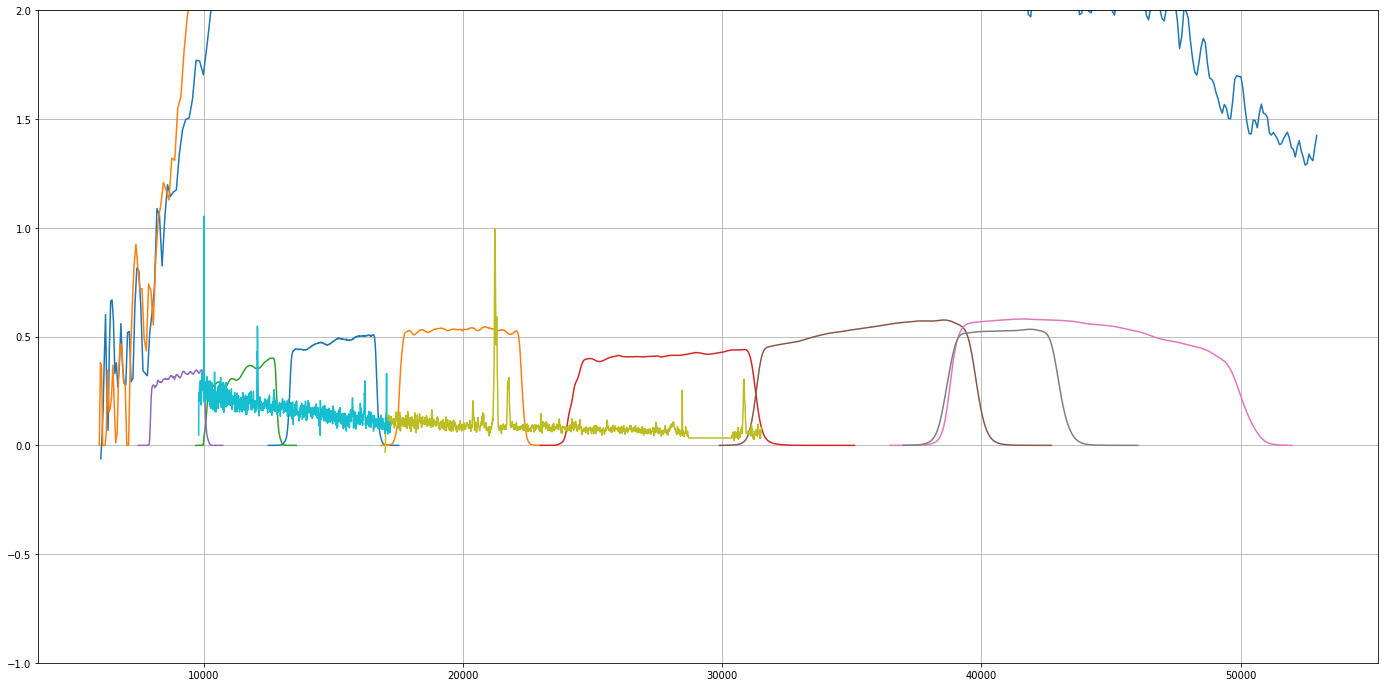

In [5]:
fig = plt.figure(figsize=(24,12))
plt.plot(F150Wwave_trans,F150Wflux_trans)
plt.plot(F200Wwave_trans,F200Wflux_trans)
plt.plot(F115Wwave_trans,F115Wflux_trans)
plt.plot(F277Wwave_trans,F277Wflux_trans)
plt.plot(F090Wwave_trans,F090Wflux_trans)
plt.plot(F356Wwave_trans,F356Wflux_trans)
plt.plot(F444Wwave_trans,F444Wflux_trans)
plt.plot(F410Mwave_trans,F410Mflux_trans)

plt.plot(wave3,flux3*10e18)
plt.plot(wave1,flux1*10e18)

#plt.plot(wave3,flux3*10e18)
#plt.plot(waveP,(fluxP+np.mean(fluxP))*10e18)
plt.plot(waveP,(fluxP)*10e18)
plt.plot(waveP2,(fluxP2)*10e18)
#plt.plot(wavePc,(fluxPc)*15e18)
#plt.plot(wavePc2,(fluxPc2)*15e18)
#plt.plot(waveP,(flux_nu))
plt.grid()
plt.ylim([-1,2])

In [21]:
np.mean(fluxP)

2.4872629353233833e-19

In [22]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [23]:

flux1_trans_corr=[]
wave1_trans_corr=[]

flux1_trans_corr_lamda=[]
trans_lamda=[]

for i in range(find_nearest(wave1, wave_trans[0]),find_nearest(wave1, wave_trans[len(wave_trans)-1])):
    flux1[i]*flux_trans[find_nearest(wave_trans, wave1[i])]
    #print(i)
    flux1_trans_corr.append(flux1[i]*flux_trans[find_nearest(wave_trans, wave1[i])])
    wave1_trans_corr.append(wave1[i])
    
    flux1_trans_corr_lamda.append(     (flux1[i]*flux_trans[find_nearest(wave_trans, wave1[i])])*wave1[i]      )
    trans_lamda.append(     flux_trans[find_nearest(wave_trans, wave1[i])]*wave1[i]                    )
    
    
    
    print(flux1[i],flux_trans[find_nearest(wave_trans, wave1[i])])

NameError: name 'wave_trans' is not defined

In [32]:
spec_wave=waveP
spec_flux=fluxP
trans_wave=F410Mwave_trans
trans_flux=F410Mflux_trans

Lam_piv=0.901*10000

Lam_piv=1.501*10000

#Lam_piv=1.15*10000

Lam_piv=1.99*10000

Lam_piv=2.786*10000

Lam_piv=3.563*10000

Lam_piv=4.421*10000
Lam_piv=4.092*10000

flux1_trans_corr=[]
wave1_trans_corr=[]

flux1_trans_corr_lamda=[]
trans_lamda=[]



for i in range(find_nearest(spec_wave, trans_wave[0]),find_nearest(spec_wave, trans_wave[len(trans_wave)-1])):
    spec_flux[i]*trans_flux[find_nearest(trans_wave, spec_wave[i])]
    #print(i)
    flux1_trans_corr.append(spec_flux[i]*trans_flux[find_nearest(trans_wave, spec_wave[i])])
    wave1_trans_corr.append(wave1[i])
    
    flux1_trans_corr_lamda.append(     (spec_flux[i]*trans_flux[find_nearest(trans_wave, spec_wave[i])])*spec_wave[i]      )
    trans_lamda.append(     trans_flux[find_nearest(trans_wave, spec_wave[i])]*spec_wave[i]                    )
    
    
Flam=scipy.integrate.trapz(flux1_trans_corr_lamda, wave1_trans_corr)/scipy.integrate.trapz(trans_lamda, wave1_trans_corr)    

Fnu=(3.34*10e-19)*(Lam_piv**2)*Flam

mAB=-2.5*np.log10(Fnu)-48.6


mAB=-2.5*np.log10(Flam)-2.402-5*np.log10(Lam_piv)
#mAB=-2.5*np.log10(Flam)-21.1
mAB, Flam

(21.22537388451098, 2.1143612755818378e-19)

In [30]:
#FNU


spec_wave=waveP2
spec_flux=fluxP2
trans_wave=F444Wwave_trans
trans_flux=F444Wflux_trans

Lam_piv=0.901*10000

Lam_piv=1.501*10000

#Lam_piv=1.15*10000

#Lam_piv=1.99*10000

#Lam_piv=2.786*10000

Lam_piv=3.563*10000

Lam_piv=4.421*10000

#Lam_piv=4.092*10000

flux1_trans_corr=[]
wave1_trans_corr=[]

flux1_trans_corr_lamda=[]
trans_lamda=[]

c=3e10

for i in range(find_nearest(spec_wave, trans_wave[0]),find_nearest(spec_wave, trans_wave[len(trans_wave)-1])):
    spec_flux[i]*trans_flux[find_nearest(trans_wave, spec_wave[i])]
    #print(i)

    
    
    flux1_trans_corr_lamda.append(     (    (  spec_flux[i]*(spec_wave[i]**2)*(3.34e4)    )     *trans_flux[find_nearest(trans_wave, spec_wave[i])])/(c/(spec_wave[i]*1e-8))     )
    trans_lamda.append(     trans_flux[find_nearest(trans_wave, spec_wave[i])]/(c/(spec_wave[i]*1e-8))                     )
    
    
#Flam=scipy.integrate.trapz(flux1_trans_corr_lamda, wave1_trans_corr)/scipy.integrate.trapz(trans_lamda, wave1_trans_corr)    
Flam=sum(flux1_trans_corr_lamda)/sum(trans_lamda)
\





mAB=-2.5*np.log10(Flam)-48.6


#mAB=-2.5*np.log10(Flam)-2.402-5*np.log10(Lam_piv)
#mAB=-2.5*np.log10(Flam)-21.1
mAB

-38.18265197796049

In [ ]:



AB=-2.5*alog10(int(F_nu*trans/nu dnu)/int(trans/nu dnu))-48.6

The trick in this equation is that nu=(3.e10)/(wave*1e-8) for wavelength in Angstroms

In [177]:
mST=-2.5*np.log10(Flam)-21.1
mST

22.36386127105785

In [178]:
mST-5*np.log10(Lam_piv)+18.6921

19.561695889009318

In [136]:
#2c
#Syn
mAB_F090W=26.45
mAB_F115W=23.87
mAB_F150W=22.46
mAB_F200W=21.67
mAB_F277W=21.08
mAB_F356W=20.74
mAB_F410M=20.71
mAB_F444W=20.65




#NIRCam
mAB_F090W_Ape=25.11920579
mAB_F115W_Ape=22.38595070 
mAB_F150W_Ape=21.05028520
mAB_F200W_Ape=20.24112994
mAB_F277W_Ape=19.57564385
mAB_F356W_Ape=19.27074036 
mAB_F410M_Ape=19.16120697
mAB_F444W_Ape=19.06954729

Corr_F090W=3.406572706323862
Corr_F115W=3.923012536942523
Corr_F150W=3.663413126569001
Corr_F200W=3.7286189367231275
Corr_F277W=3.997076273599807
Corr_F356W=3.869936440516827
Corr_F410M=4.164061997592537
Corr_F444W=4.287272206074754







In [144]:
Corr=Corr_F090W,Corr_F115W,Corr_F150W,Corr_F200W,Corr_F277W,Corr_F356W,Corr_F410M,Corr_F444W

np.mean(Corr),np.std(Corr)

(3.8799955280428047, 0.2636710967332115)

In [147]:
mag_Syn=mAB_F410M
mag=mAB_F410M_Ape


Lam_piv=0.901*10000

Lam_piv=1.501*10000

#Lam_piv=1.15*10000

Lam_piv=1.99*10000

Lam_piv=2.786*10000

Lam_piv=3.563*10000

#Lam_piv=4.421*10000

Lam_piv=4.092*10000


Flam_Syn=(0.109446*np.e**(-0.921034*mag_Syn))/Lam_piv**2
Flam=(0.109446*np.e**(-0.921034*mag))/Lam_piv**2

Flam/Flam_Syn


4.164061997592537

In [43]:
#2a
#Syn
mAB_F090W=24.83
mAB_F115W=22.81
mAB_F150W=21.34
mAB_F200W=20.53
mAB_F277W=19.85
mAB_F356W=19.55
maB_F410M=19.43
mAB_F444W=19.34
#NIRCam
mAB_F090W_Ape=24.68312544
mAB_F115W_Ape=22.49764619 
mAB_F150W_Ape=21.13589034
mAB_F200W_Ape=20.29894157
mAB_F277W_Ape=19.60524615 
mAB_F356W_Ape=19.30117861
mAB_F410M_Ape=19.17864721
mAB_F444W_Ape=19.09207728



mAB_F090W_NS337_Syn=25.034
mAB_F115W_NS337_Syn=23.4435
mAB_F150W_NS337_Syn=22.48734
mAB_F200W_NS337_Syn=22.02113
mAB_F277W_NS337_Syn=21.53909 
mAB_F356W_NS337_Syn=21.3215
mAB_F410M_NS337_Syn=21.225
mAB_F444W_NS337_Syn=21.119


mAB_F090W_NS337=24.60806784
mAB_F115W_NS337=23.07000773
mAB_F150W_NS337=22.23490463
mAB_F200W_NS337=21.77176131 
mAB_F277W_NS337=21.32998397 
mAB_F356W_NS337= 21.13747477
mAB_F410M_NS337=21.04796542
mAB_F444W_NS337=20.96955399 



Corr_F090W=1.1448532507345983
Corr_F115W=1.333341875477706
Corr_F150W=1.206823784193523
Corr_F200W=1.2371528737075688
Corr_F277W=1.2528570929334482
Corr_F356W=1.2575595278442475
Corr_F410M=1.260494955412231
Corr_F444W=1.256519069405604

Corr_F090W_NS337=1.48037
Corr_F115W_NS337=1.410
Corr_F150W_NS337=1.2617
Corr_F200W_NS337=1.258
Corr_F277W_NS337=1.212
Corr_F356W_NS337=1.18470
Corr_F410M_NS337=1.177
Corr_F444W_NS337=1.14756  

In [44]:
_NS337Corr=Corr_F090W_NS337,Corr_F115W_NS337,Corr_F150W_NS337,Corr_F200W_NS337,Corr_F277W_NS337,Corr_F356W_NS337,Corr_F410M_NS337,Corr_F444W_NS337

np.mean(Corr),np.std(Corr)

(1.243700303713616, 0.04991418105663524)

In [42]:
mag_Syn=mAB_F410M_NS337_Syn
mag=mAB_F410M_NS337


Lam_piv=0.901*10000

Lam_piv=1.501*10000

#Lam_piv=1.15*10000

Lam_piv=1.99*10000

Lam_piv=2.786*10000

Lam_piv=3.563*10000

Lam_piv=4.421*10000

#Lam_piv=4.092*10000


Flam_Syn=(0.109446*np.e**(-0.921034*mag_Syn))/Lam_piv**2
Flam=(0.109446*np.e**(-0.921034*mag))/Lam_piv**2

Flam/Flam_Syn


1.1771012723509378

In [ ]:
#2a 3853 24.68312544 0.07090901 22.49764619 0.01037747 21.13589034 0.00281608 20.29894157 0.00126707 19.60524615 0.00061283 19.30117861 0.00066641 19.17864721 0.00073834 19.09207728 0.00036259

#2c 3856 25.11920579 0.09871233 22.38595070 0.00893117 21.05028520 0.00248068 20.24112994 0.00114901 19.57564385 0.00057597 19.27074036 0.00062179 19.16120697 0.00069479 19.06954729 0.00034057

#9c 3851 26.85353113 0.11672326 26.52741288 0.09310918 26.32587543 0.07617181 26.03283005 0.05941581 25.99269589 0.04267224 25.94224131 0.05147381 26.01910907 0.06111080 25.71391527 0.02649103

#1a? 3880 21.91635862 0.00962679 21.71717841 0.00928200 21.55288600 0.00881995 21.42072736 0.00851894 21.59189024 0.00813671 22.04524347 0.00898983 22.25662994 0.01018324 22.25623235 0.00610907

#1a? 3951 24.79168523 0.08022863 24.49681174 0.07330466 24.57457180 0.07861400 24.46080907 0.07272947 24.49071007 0.06665176 24.95964419 0.07855234 25.16387985 0.09358837 25.09173152 0.04689063

#NS337 3479 24.60806784 0.03363779 23.07000773 0.00898142 22.23490463 0.00408087 21.77176131 0.00260244 21.32998397 0.00151268 21.13747477 0.00170118 21.04796542 0.00189606 20.96955399 0.00087222

In [55]:
f=scipy.integrate.trapz(flux1_trans_corr, wave1_trans_corr)
f=scipy.integrate.trapz(flux1_trans_corr_lamda, wave1_trans_corr)/scipy.integrate.trapz(trans_lamda, wave1_trans_corr)
f

3.648803067705699e-18

In [56]:
sum(flux1_trans_corr_lamda)/sum(trans_lamda)

3.650684743648667e-18

In [57]:
-2.5*np.log10(f/3631*10e-23)

107.4946895613745

In [58]:
-2.5*np.log10(f/Lam_piv)-48.6

5.435575669700448

In [59]:
Lam_piv=1.501*10000

In [60]:
-2.5*np.log10(Flam)-2.402-5*np.log10(Lam_piv)

20.31072047787592

In [ ]:
2.5*np.log10(Lam_piv)

In [ ]:
ABmag = - 2.5 log Fnu - 48.6.

In [ ]:
-2.5*np.log10(f)-48.6

In [ ]:
3.34x 10-19 A2F,\

In [ ]:
-2.5*np.log10(Fnu)- 48.6

In [51]:
(3.34*10e-19)*(Lam_piv**2)*f

TypeError: unsupported operand type(s) for *: 'float' and '_io.TextIOWrapper'

In [ ]:
 ABmag = - 2.5 log Fnu - 48.6.